In [21]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hymenoptera/README.md
/kaggle/input/hymenoptera/cover.jpg
/kaggle/input/hymenoptera/hymenoptera/val/ants/2219621907_47bc7cc6b0.jpg
/kaggle/input/hymenoptera/hymenoptera/val/ants/183260961_64ab754c97.jpg
/kaggle/input/hymenoptera/hymenoptera/val/ants/892676922_4ab37dce07.jpg
/kaggle/input/hymenoptera/hymenoptera/val/ants/147542264_79506478c2.jpg
/kaggle/input/hymenoptera/hymenoptera/val/ants/8124241_36b290d372.jpg
/kaggle/input/hymenoptera/hymenoptera/val/ants/751649788_78dd7d16ce.jpg
/kaggle/input/hymenoptera/hymenoptera/val/ants/1119630822_cd325ea21a.jpg
/kaggle/input/hymenoptera/hymenoptera/val/ants/161292361_c16e0bf57a.jpg
/kaggle/input/hymenoptera/hymenoptera/val/ants/172772109_d0a8e15fb0.jpg
/kaggle/input/hymenoptera/hymenoptera/val/ants/1743840368_b5ccda82b7.jpg
/kaggle/input/hymenoptera/hymenoptera/val/ants/1337725712_2eb53cd742.jpg
/kaggle/input/hymenoptera/hymenoptera/val/ants/854534770_31f6156383.jpg
/kaggle/input/hymenoptera/hymenoptera/val/ants/F.pergan.28(f).

In [45]:
from keras.models import Sequential
from keras.layers import Activation,Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
input_shape=(150,150,3)
img_width=150
img_height=150
batch_size=4

train_data_dir='/kaggle/input/hymenoptera/hymenoptera/train'
validation_data_dir='/kaggle/input/hymenoptera/hymenoptera/val'

validation_data_gen=ImageDataGenerator(
    rescale=1./255
)
train_data_gen=ImageDataGenerator(
rescale=1./255,
    rotation_range=0.3,
    width_shift_range=0.3,
    height_shift_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
    
)

train_generator=train_data_gen.flow_from_directory(
    train_data_dir,
    target_size=(img_width,img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)
validation_generator=train_data_gen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width,img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)

Found 244 images belonging to 2 classes.
Found 153 images belonging to 2 classes.


In [53]:
model=Sequential()
model.add(Conv2D(64,(3,3),input_shape=input_shape,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3),input_shape=input_shape,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3),input_shape=input_shape,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(16,(3,3),input_shape=input_shape,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(8,(3,3),input_shape=input_shape,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))




model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(32))
model.add(Activation('relu'))

model.add(Dense(8))
model.add(Activation('relu'))

model.add(Dropout(0.3))
model.add(Dense(2))
model.add(Activation('relu'))


model.add(Dense(1))
model.add(Activation('sigmoid'))

print(model.summary())

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_57 (Conv2D)          (None, 148, 148, 64)      1792      
                                                                 
 batch_normalization_14 (Ba  (None, 148, 148, 64)      256       
 tchNormalization)                                               
                                                                 
 max_pooling2d_56 (MaxPooli  (None, 74, 74, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_58 (Conv2D)          (None, 72, 72, 32)        18464     
                                                                 
 batch_normalization_15 (Ba  (None, 72, 72, 32)        128       
 tchNormalization)                                               
                                                     

In [54]:
history=model.fit_generator(
train_generator,
    steps_per_epoch=244//batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=90//batch_size
)

Epoch 1/10


/tmp/ipykernel_44/353963454.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(


61/61 [==============================] - 15s 212ms/step - loss: 0.7012 - accuracy: 0.5082 - val_loss: 0.6924 - val_accuracy: 0.5455
Epoch 2/10
61/61 [==============================] - 12s 202ms/step - loss: 0.6937 - accuracy: 0.5246 - val_loss: 0.6925 - val_accuracy: 0.5000
Epoch 3/10
61/61 [==============================] - 13s 217ms/step - loss: 0.6954 - accuracy: 0.5451 - val_loss: 0.7292 - val_accuracy: 0.4659
Epoch 4/10
61/61 [==============================] - 12s 197ms/step - loss: 0.6725 - accuracy: 0.5656 - val_loss: 0.7311 - val_accuracy: 0.4659
Epoch 5/10
61/61 [==============================] - 12s 201ms/step - loss: 0.6615 - accuracy: 0.5656 - val_loss: 0.7765 - val_accuracy: 0.4659
Epoch 6/10
61/61 [==============================] - 13s 215ms/step - loss: 0.6489 - accuracy: 0.6598 - val_loss: 0.8071 - val_accuracy: 0.5114
Epoch 7/10
61/61 [==============================] - 13s 212ms/step - loss: 0.6523 - accuracy: 0.6270 - val_loss: 0.8020 - val_accuracy: 0.4886
Epoch 8/10

In [55]:
model.save('hymenoptera2.h5')

In [56]:
history.history

{'loss': [0.7011892199516296,
  0.6937385201454163,
  0.6954371929168701,
  0.6725063920021057,
  0.6614682078361511,
  0.648943305015564,
  0.6522771716117859,
  0.691103458404541,
  0.6834982633590698,
  0.6589958667755127],
 'accuracy': [0.5081967115402222,
  0.5245901346206665,
  0.5450819730758667,
  0.5655737519264221,
  0.5655737519264221,
  0.6598360538482666,
  0.6270492076873779,
  0.5983606576919556,
  0.5942623019218445,
  0.5983606576919556],
 'val_loss': [0.6923709511756897,
  0.6924608945846558,
  0.7291585803031921,
  0.7311335206031799,
  0.7764508724212646,
  0.807147741317749,
  0.8020429611206055,
  0.7344652414321899,
  0.6588671803474426,
  0.8718748092651367],
 'val_accuracy': [0.5454545617103577,
  0.5,
  0.46590909361839294,
  0.46590909361839294,
  0.46590909361839294,
  0.5113636255264282,
  0.4886363744735718,
  0.5568181872367859,
  0.6477272510528564,
  0.5113636255264282]}

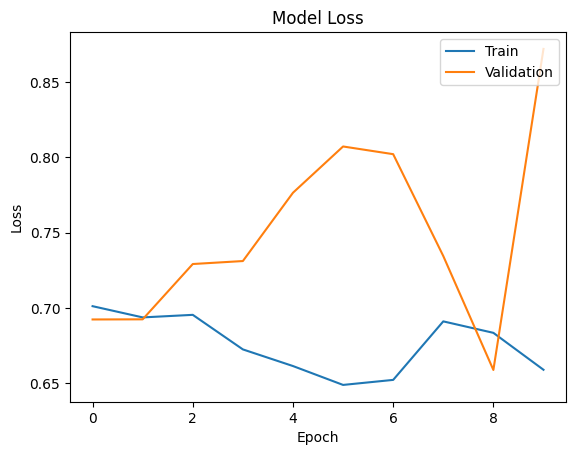

In [58]:
import matplotlib.pyplot as plt




# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


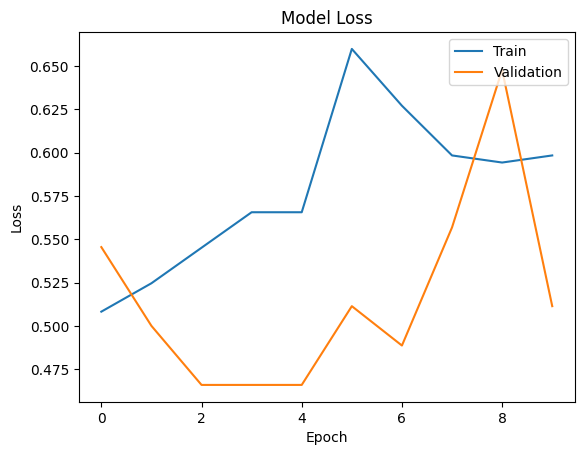

In [59]:
import matplotlib.pyplot as plt




# Plot training & validation loss values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


/tmp/ipykernel_44/121730995.py:18: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(validation_generator, nb_validation_samples // batch_size+1)


[[70  0]
 [83  0]]


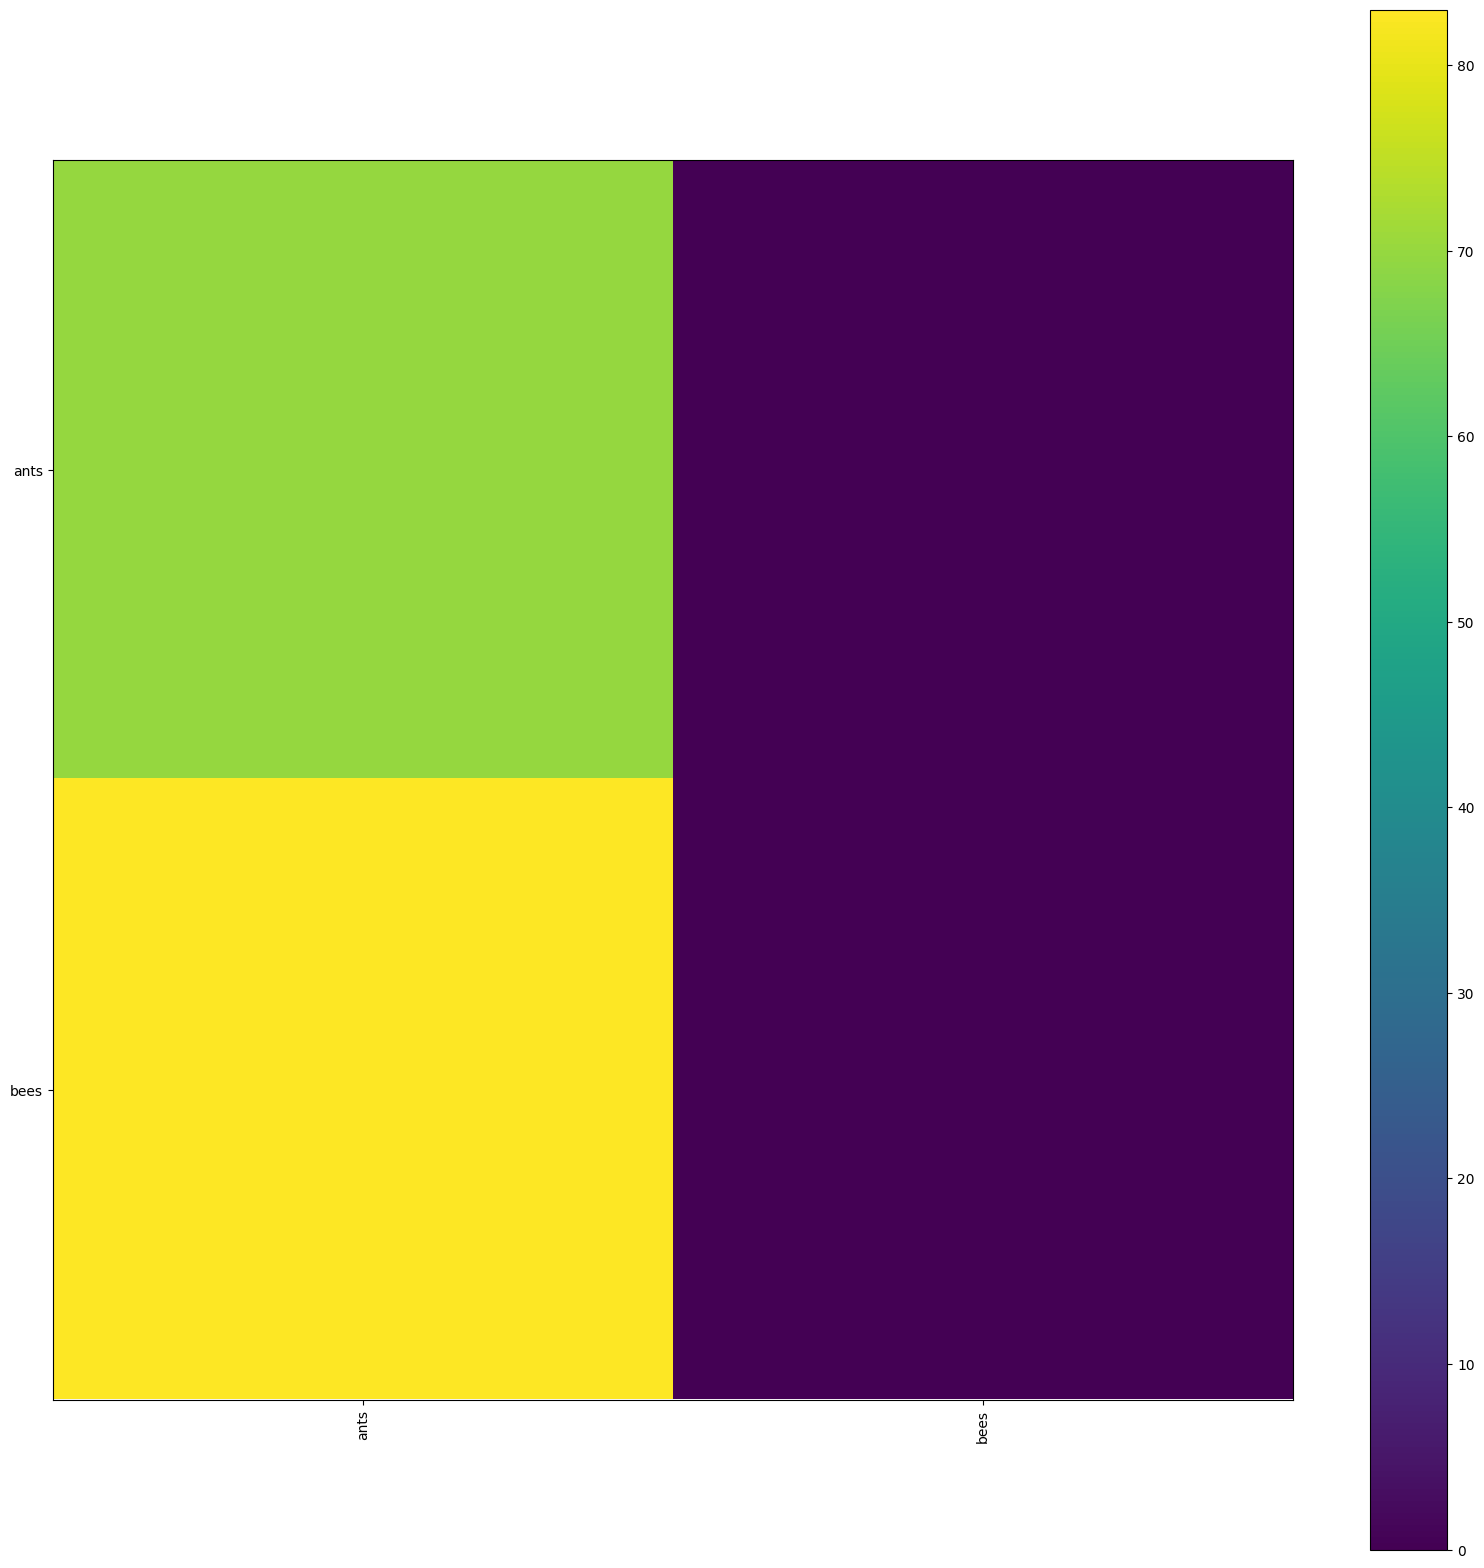

In [60]:
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from keras.models import load_model

img_row, img_height, img_depth = 150,150,3


class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())

nb_train_samples = 8005
nb_validation_samples = 2023

#Confution Matrix and Classification Report
Y_pred = model.predict_generator(validation_generator, nb_validation_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

target_names = list(class_labels.values())

plt.figure(figsize=(20,20))
cnf_matrix = confusion_matrix(validation_generator.classes, y_pred)
print(cnf_matrix)
plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)

(1, 150, 150, 3)
1/1 [==============================] - 0s 265ms/step
[[1.]]
[[1.]]
This is ants


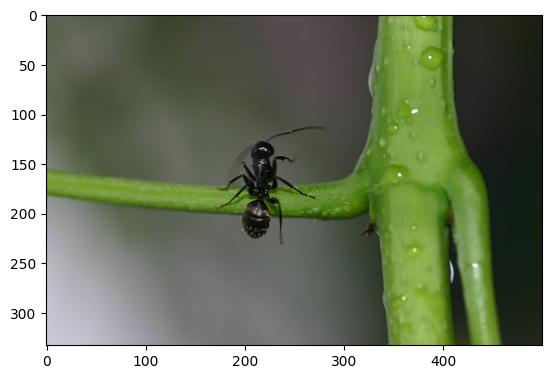

In [68]:
import numpy as np
import tensorflow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import load_img
from tensorflow.keras import models
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as img

image_path = '/kaggle/input/hymenoptera/hymenoptera/val/ants/205398178_c395c5e460.jpg'
model = models.load_model('/kaggle/working/hymenoptera2.h5')
test_image = load_img(image_path,target_size = (150,150,3))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis = 0)
print(test_image.shape)
result = model.predict(test_image)
print(result)
print(result)
if result[0][0] == 1:
  print("This is ants")
else:
  print("this is bees")
  # reading the image
testImage = img.imread(image_path)

# displaying the modified image
plt.imshow(testImage)

(1, 150, 150, 3)
1/1 [==============================] - 0s 214ms/step
[[1.]]
[[1.]]
This is ants


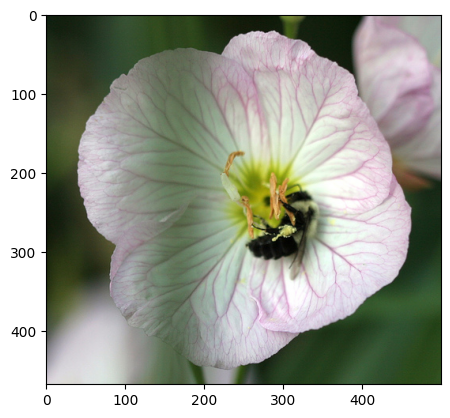

In [75]:
import numpy as np
import tensorflow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import load_img
from tensorflow.keras import models
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as img

image_path = '/kaggle/input/hymenoptera/hymenoptera/val/bees/151594775_ee7dc17b60.jpg'
model = models.load_model('/kaggle/working/hymenoptera2.h5')
test_image = load_img(image_path,target_size = (150,150,3))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis = 0)
print(test_image.shape)
result = model.predict(test_image)
print(result)
print(result)
if result[0][0] == 1:
  print("This is ants")
else:
  print("this is bees")
  # reading the image
testImage = img.imread(image_path)

# displaying the modified image
plt.imshow(testImage)